In [1]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, tqdm, sys
from matplotlib.pyplot import *
import local, tools_cmbalm
import binning, plottools as pl

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/actsims/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/soapack/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/orphics/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/tilec/")
from pixell import enmap
from soapack import interfaces

In [3]:
qids = ['boss_d01','boss_01','boss_d02','boss_02','boss_d03','boss_03','boss_d04','boss_04','s16_d01','s16_d02','s16_d03']
kwargs = {'snmin':0,'snmax':10}

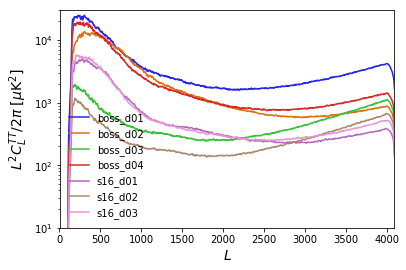

In [7]:
for q in qids:
    pl.plot_1dstyle(xmin=2,xmax=4096,ymin=1e1,ymax=3e4,xlab=r'$L$',ylab=r'$L^2 C^{TT}_L/2\pi$ [$\mu$K$^2$]',ylog=True)
    axhline(0)
    aobj[q] = local.init_analysis_params(qid=q,**kwargs)
    l, ncl[q], vcl = np.loadtxt(aobj[q].fscl['n'],unpack=True,usecols=(0,1,7))
    s = aobj[q].l**2/2./np.pi
    if '_d0' in q:
        plot(aobj[q].l,s*ncl[q],label=q)
    #plot(aobj[q].l,s*(mcl[q]-ncl[q]),ls=ls,color='b',label=q+',sim (signal)')
legend()

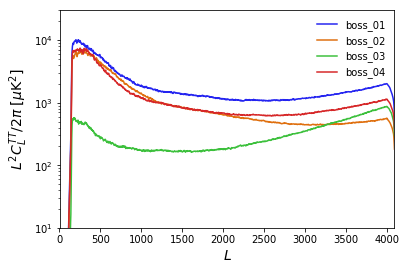

In [8]:
for q in qids:
    pl.plot_1dstyle(xmin=2,xmax=4096,ymin=1e1,ymax=3e4,xlab=r'$L$',ylab=r'$L^2 C^{TT}_L/2\pi$ [$\mu$K$^2$]',ylog=True)
    axhline(0)
    aobj[q] = local.init_analysis_params(qid=q,**kwargs)
    l, ncl[q], vcl = np.loadtxt(aobj[q].fscl['n'],unpack=True,usecols=(0,1,7))
    s = aobj[q].l**2/2./np.pi
    if '_0' in q:
        plot(aobj[q].l,s*ncl[q],label=q)
    #plot(aobj[q].l,s*(mcl[q]-ncl[q]),ls=ls,color='b',label=q+',sim (signal)')
legend()

In [19]:
for q in qids:
    tools_cmbalm.alm2aps_null(q,overwrite=False,verbose=True,**kwargs)

100%|██████████| 11/11 [00:22<00:00,  2.04s/it]


cmb alm2aps: save sim


100%|██████████| 11/11 [00:17<00:00,  1.62s/it]


cmb alm2aps: save sim


100%|██████████| 11/11 [00:22<00:00,  2.05s/it]


cmb alm2aps: save sim


100%|██████████| 11/11 [00:18<00:00,  1.73s/it]


cmb alm2aps: save sim


100%|██████████| 11/11 [00:23<00:00,  2.18s/it]


cmb alm2aps: save sim


100%|██████████| 11/11 [00:18<00:00,  1.70s/it]


cmb alm2aps: save sim


100%|██████████| 11/11 [00:26<00:00,  2.37s/it]


cmb alm2aps: save sim


100%|██████████| 11/11 [00:21<00:00,  1.93s/it]


cmb alm2aps: save sim


100%|██████████| 11/11 [00:23<00:00,  2.12s/it]


cmb alm2aps: save sim


100%|██████████| 11/11 [00:23<00:00,  2.17s/it]


cmb alm2aps: save sim


100%|██████████| 11/11 [00:23<00:00,  2.17s/it]

cmb alm2aps: save sim


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


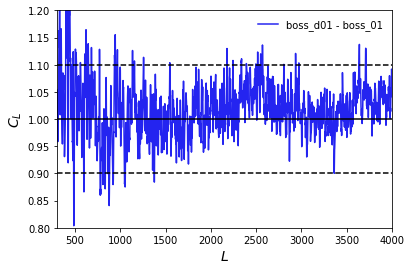

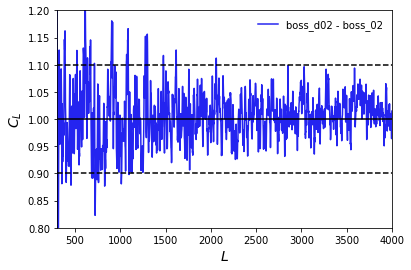

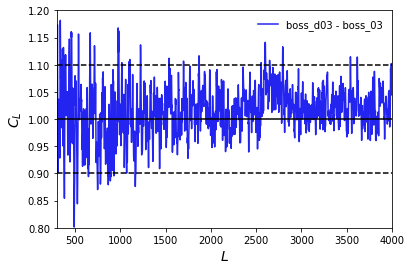

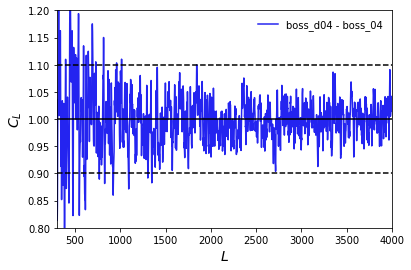

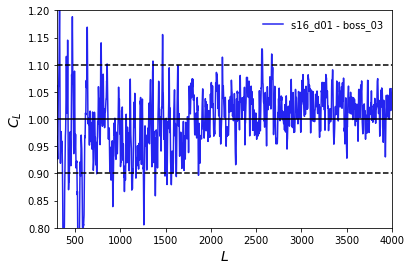

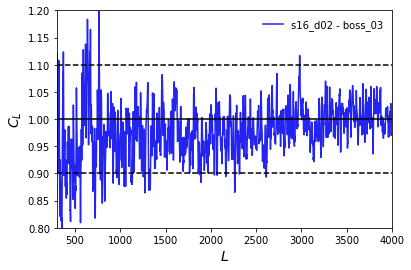

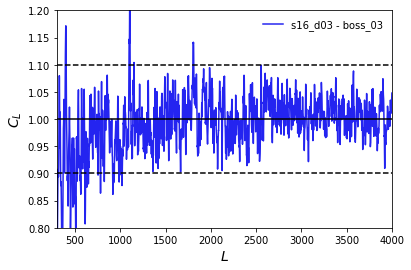

In [27]:
for q in qids:
    if '_0' in q: continue
    pid = q.replace('_d0','_0')
    if 's16' in q:
        pid = 'boss_03'
    l, cl_null, vl = np.loadtxt(aobj[q].fscl_nul,unpack=True,usecols=(0,1,7))
    l, ol_null = np.loadtxt(aobj[q].fcls_nul[0],unpack=True,usecols=(0,1))
    pl.plot_1dstyle(xmin=300,xmax=4000,ymin=.8,ymax=1.2)
    plot(l,ol_null/cl_null,label=q+' - '+pid)
    axhline(1.,color='k',ls='-')
    axhline(.9,color='k',ls='--')
    axhline(1.1,color='k',ls='--')
    legend()
    show()